In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt #can also be done as import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
data = pd.read_csv('/content/drive/MyDrive/output.csv')

In [10]:
data.sample(30)
#toyi view the dataset in a random manner

,Year,Month,State,County,Rate
853634,2008,December,Colorado,Ouray County,4.6
288756,1990,June,Kentucky,Perry County,7.6
217182,2012,May,Michigan,Missaukee County,9.3
55273,2014,September,New Hampshire,Cheshire County,3.6
275423,1990,October,Texas,Smith County,6.5
312598,1993,August,California,Orange County,7.0
624172,2003,September,North Dakota,Emmons County,4.2
638661,2000,February,Missouri,Randolph County,3.8
790831,2004,April,Virginia,Middlesex County,3.4
634054,2003,November,Minnesota,Murray County,3.8


In [11]:
data.describe(include='all')
#summary statistics of the dataset, to check for unique values and the likes

,Year,Month,State,County,Rate
count,885548.000000,885548,885548,885548,885548.000000
unique,NaN,12,47,1752,NaN
top,NaN,March,Texas,Washington County,NaN
freq,NaN,74540,57658,8930,NaN
mean,2003.000017,NaN,NaN,NaN,6.175010
std,7.824893,NaN,NaN,NaN,3.112535
min,1990.000000,NaN,NaN,NaN,0.000000
25%,1996.000000,NaN,NaN,NaN,4.000000
50%,2003.000000,NaN,NaN,NaN,5.500000
75%,2010.000000,NaN,NaN,NaN,7.700000


In [12]:
data.isnull().sum()

Year      0
Month     0
State     0
County    0
Rate      0
dtype: int64

This data doesnt have any missing values

In [13]:
datah = data.sort_values('Rate', ascending=False)
datah

,Year,Month,State,County,Rate
351231,1992,January,Colorado,San Juan County,58.4
337760,1992,February,Colorado,San Juan County,56.5
342958,1992,March,Colorado,San Juan County,54.9
240742,1991,February,Texas,Starr County,54.0
359186,1992,April,Colorado,San Juan County,53.3
...,...,...,...,...,...
275416,1990,October,Texas,McMullen County,0.0
261909,1991,April,Texas,Loving County,0.0
319216,1993,January,Texas,Loving County,0.0
332623,1993,July,Texas,Loving County,0.0


In [14]:
datah.tail()

,Year,Month,State,County,Rate
275416,1990,October,Texas,McMullen County,0.0
261909,1991,April,Texas,Loving County,0.0
319216,1993,January,Texas,Loving County,0.0
332623,1993,July,Texas,Loving County,0.0
281122,1990,August,Texas,McMullen County,0.0


#from the bottom of the dataset, we can see that some county's in texas had no unemployment rate. The code below shows us more details about the rows with zero unemployment rate.


In [15]:
datah.loc[datah['Rate']== 0.0]

,Year,Month,State,County,Rate
240571,1991,February,Texas,Loving County,0.0
253942,1991,January,Texas,Loving County,0.0
283943,1990,May,Texas,McMullen County,0.0
270072,1991,November,Texas,Loving County,0.0
324668,1993,September,Texas,Loving County,0.0
292152,1990,September,Texas,McMullen County,0.0
316395,1993,May,Texas,Loving County,0.0
264736,1991,December,Texas,Loving County,0.0
245907,1991,March,Texas,Loving County,0.0
297526,1990,December,Texas,Loving County,0.0



Texas is the only state in the dataset that had 0.0 unemployment rate at one point or the other

In [16]:
state_count=datah['State'].value_counts()
state_count

Texas             57658
Virginia          39900
Missouri          37260
Kentucky          36360
Kansas            34020
Illinois          33048
North Carolina    32400
Iowa              32076
Tennessee         30780
Nebraska          30132
Indiana           29808
Ohio              28512
Minnesota         28188
Mississippi       26568
Oklahoma          24948
Arkansas          24300
Michigan          24236
Wisconsin         23328
Alabama           21708
Pennsylvania      21708
South Dakota      21384
Colorado          20736
New York          20088
Montana           18144
West Virginia     17820
North Dakota      17172
California        16878
South Carolina    14904
Idaho             14256
Washington        12636
Oregon            11664
New Mexico        10692
Utah               9396
Maryland           7776
Wyoming            7452
New Jersey         6804
Louisiana          6464
Nevada             5508
Maine              5184
Arizona            4860
Massachusetts      4536
Vermont         

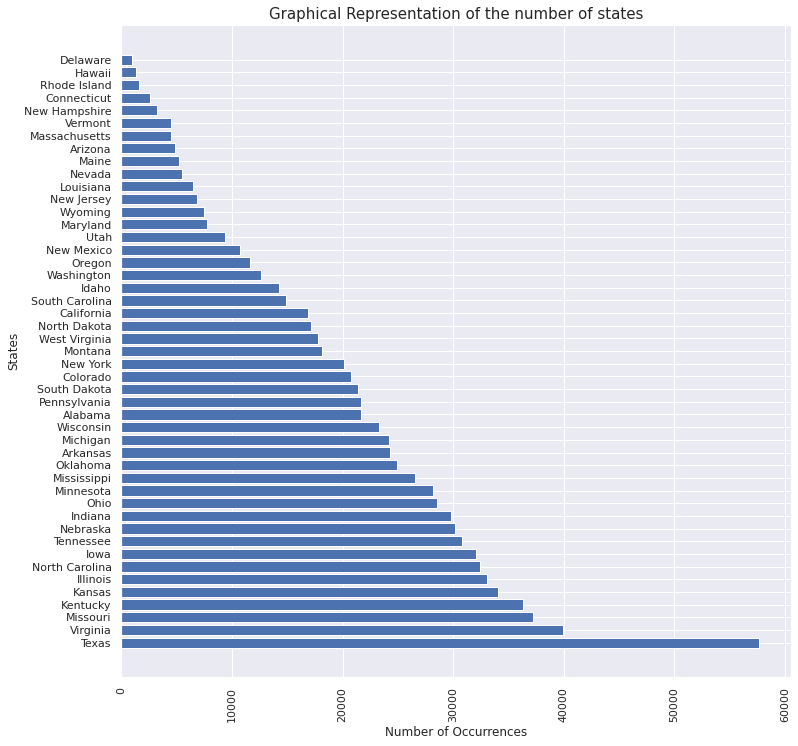

In [17]:
plt.figure(figsize=(12,12))
plt.barh( state_count.index, state_count.values)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('States', fontsize=12)
plt.title('Graphical Representation of the number of states', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Texas has the highest number of occurence in the state column of the dataset, the fact that it had some 0.0 rate of unemployment wont affect its no of occurence. 
Delaware is the state with the least number of occurence.

Text(0.5, 1.0, 'Unemployment Rate by Year')

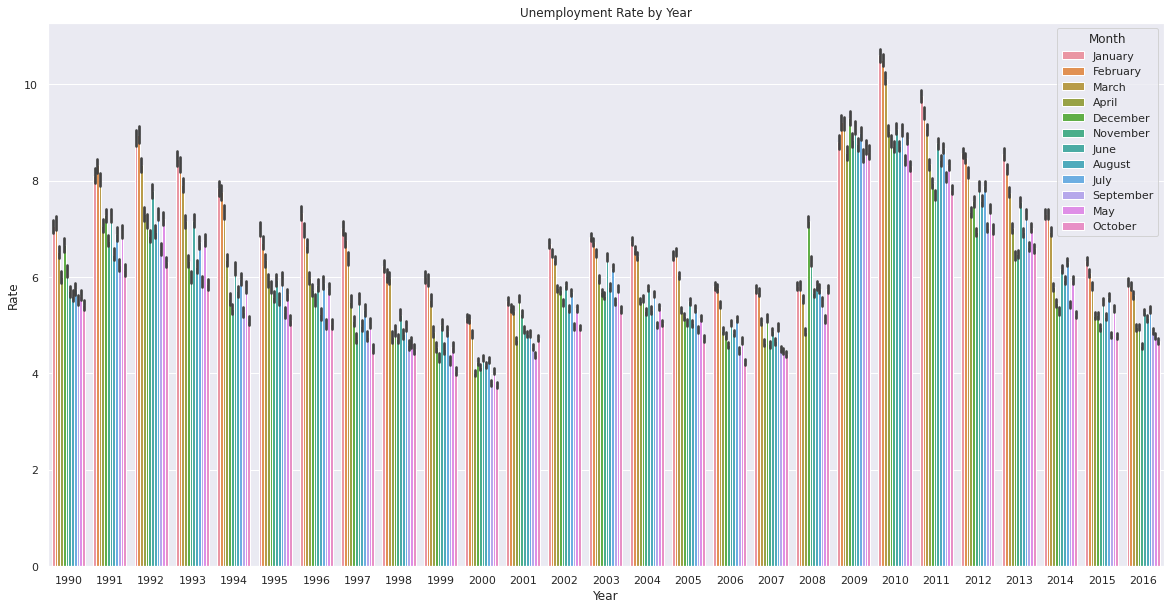

In [18]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(data=datah, x="Year" ,y="Rate", hue="Month")
ax.set_title("Unemployment Rate by Year")

The graph above is pretty hard to navigate, but we can see that in most of the years January, Febuary and March had the highest Unemployment Rate. For some years it is noticed that there is a spike in the unemployment rate mid year, while for others it is towards the year end

Text(0.5, 1.0, 'Unemployment Rate by Year')

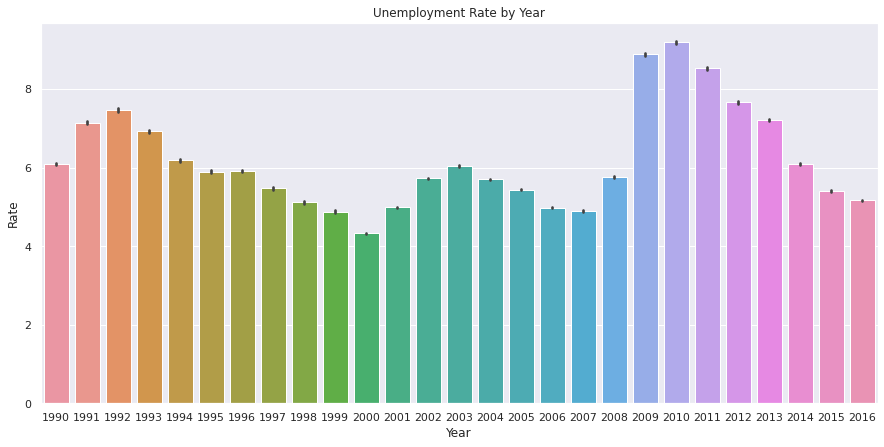

In [19]:
sns.set(rc={'figure.figsize':(15,7)})
ax=sns.barplot(data=datah,x='Year',y='Rate')
ax.set_title("Unemployment Rate by Year")

Year 2000 had the lowest Unemployment Rate while the year 2010 had the highest

In [20]:
data_2010= data[data.Year.eq(2010)]
data_2010

,Year,Month,State,County,Rate
136792,2010,February,Mississippi,Newton County,10.5
136793,2010,February,Mississippi,Panola County,15.0
136794,2010,February,Mississippi,Monroe County,14.3
136795,2010,February,Mississippi,Hinds County,10.4
136796,2010,February,Mississippi,Kemper County,14.5
...,...,...,...,...,...
171163,2010,November,Maine,Somerset County,11.2
171164,2010,November,Maine,Oxford County,10.7
171165,2010,November,Maine,Knox County,7.2
171166,2010,November,Maine,Piscataquis County,9.6


Text(0.5, 1.0, 'Unemployment Rate in 2010 by State')

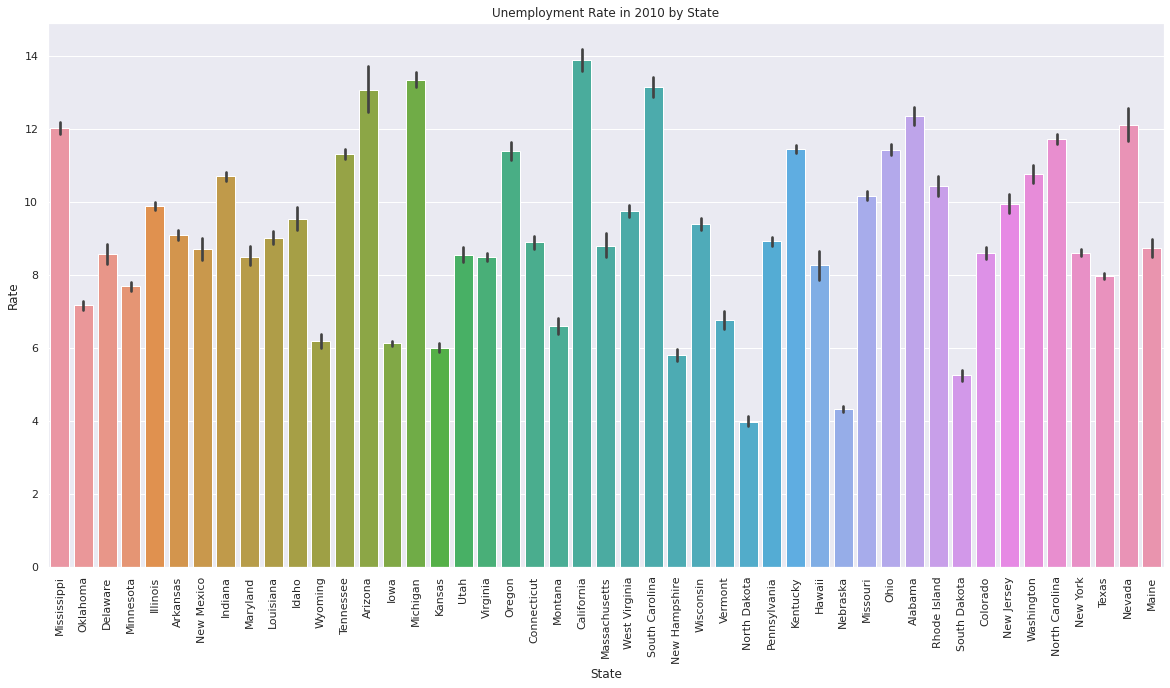

In [21]:
sns.set(rc={'figure.figsize':(20,10)})
ax=sns.barplot(data=data_2010,x='State',y='Rate')
for item in ax.get_xticklabels(): 
    item.set_rotation(90)
#to give room for the x axis labels    
ax.set_title("Unemployment Rate in 2010 by State")

In 2010, California had the highest unemployment while North Dakota had the lowest unemployment rate

Text(0.5, 1.0, 'Unemployment Rate in 2010 by Month')

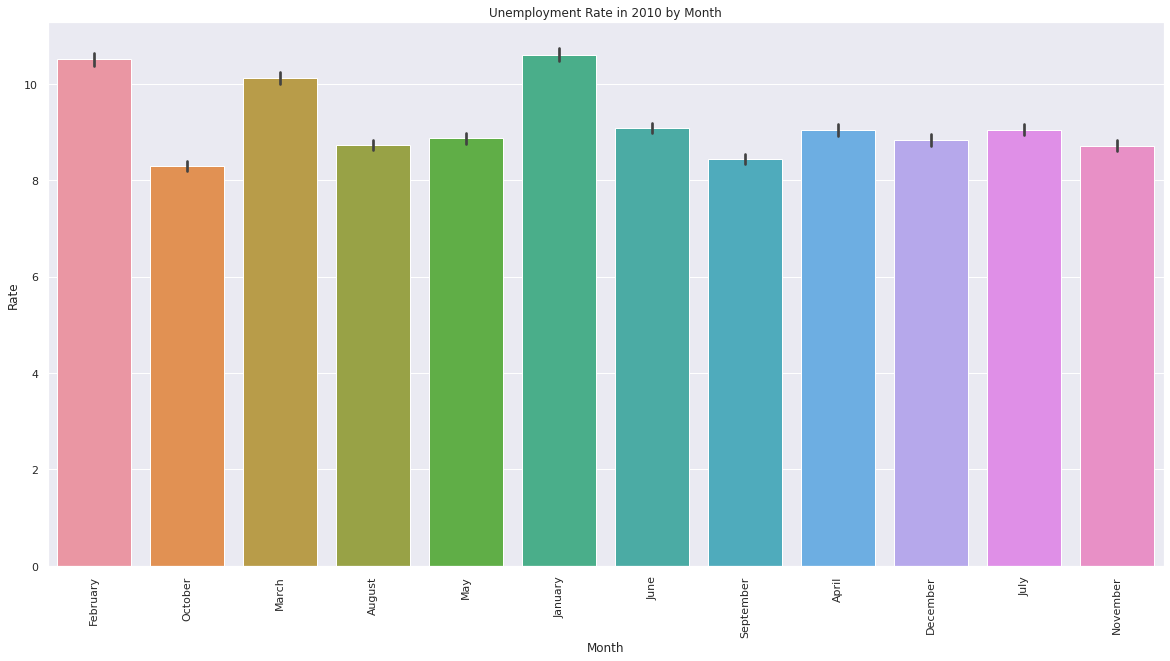

In [22]:
sns.set(rc={'figure.figsize':(20,10)})
ax=sns.barplot(data=data_2010,x='Month',y='Rate')
for item in ax.get_xticklabels(): 
    item.set_rotation(90)
#to give room for the x axis labels    
ax.set_title("Unemployment Rate in 2010 by Month")

From the plot above, Unemployment Rate was at its peak in the first quarter of 2010


Text(0.5, 1.0, 'Unemployment Rate by State')

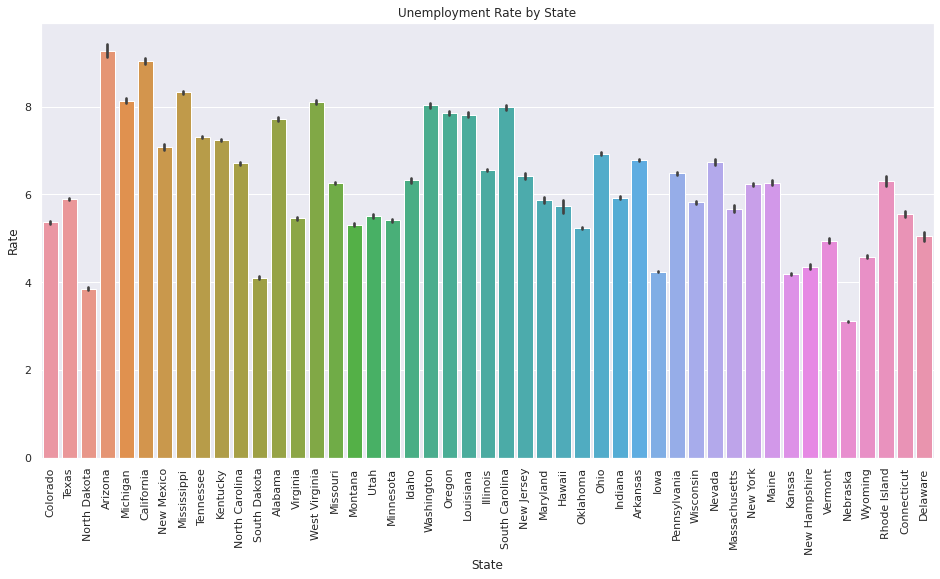

In [23]:
sns.set(rc={'figure.figsize':(16,8)})
ax=sns.barplot(data=datah,x='State',y='Rate')
for item in ax.get_xticklabels():#to give room for the x axis labels
    item.set_rotation(90)
ax.set_title("Unemployment Rate by State")

In the whole of the dataset arizona has the highest unemployment rate and this due to a massive increase in the labor force.

In [24]:
arizona_state = datah.loc[datah['State']== 'Arizona']
#selecting rows whose state is arizona
arizona_state

,Year,Month,State,County,Rate
409256,1994,August,Arizona,Yuma County,40.5
510370,1999,August,Arizona,Yuma County,40.4
428749,1994,July,Arizona,Yuma County,39.2
496265,1996,July,Arizona,Yuma County,38.9
530181,1999,July,Arizona,Yuma County,38.8
...,...,...,...,...,...
465108,1997,November,Arizona,Maricopa County,2.6
513196,1999,May,Arizona,Pima County,2.5
459466,1997,December,Arizona,Maricopa County,2.5
547109,1998,May,Arizona,Maricopa County,2.4


Text(0.5, 1.0, 'Unemployment Rate in Arizona per County')

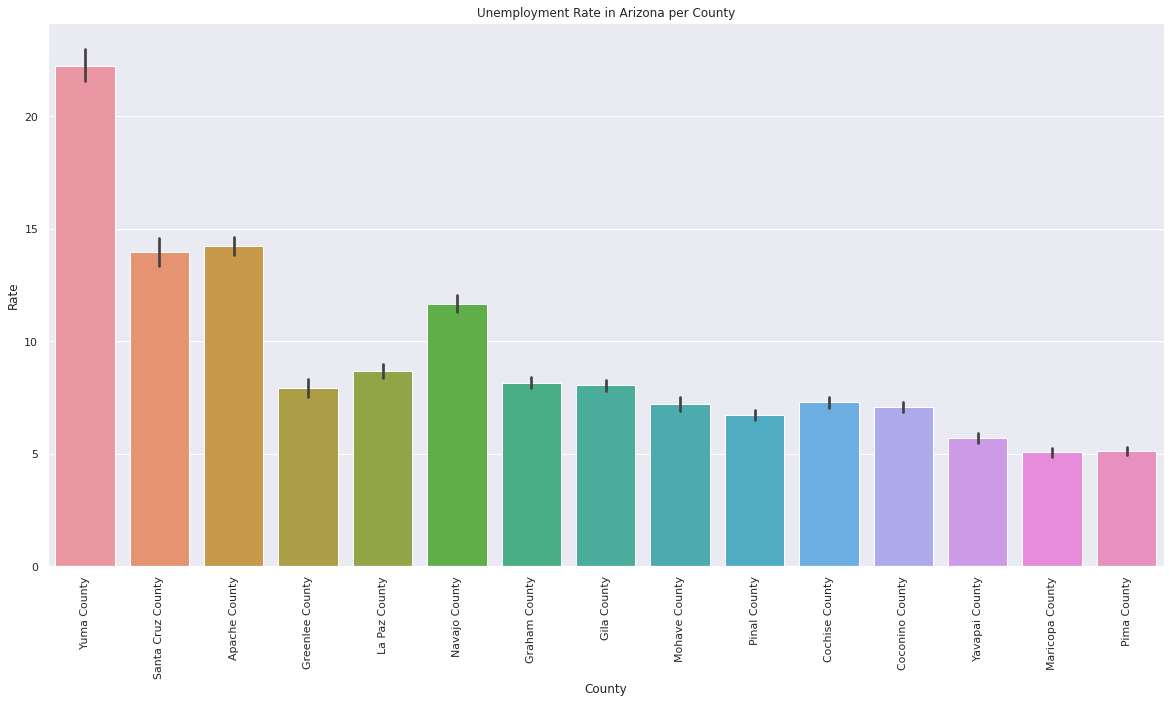

In [25]:
sns.set(rc={'figure.figsize':(20,10)})
ax=sns.barplot(data=arizona_state,x='County',y='Rate')
for item in ax.get_xticklabels(): 
    item.set_rotation(90)
#to give room for the x axis labels 
ax.set_title("Unemployment Rate in Arizona per County")

Text(0.5, 1.0, 'Unemployment Rate in the US per Month')

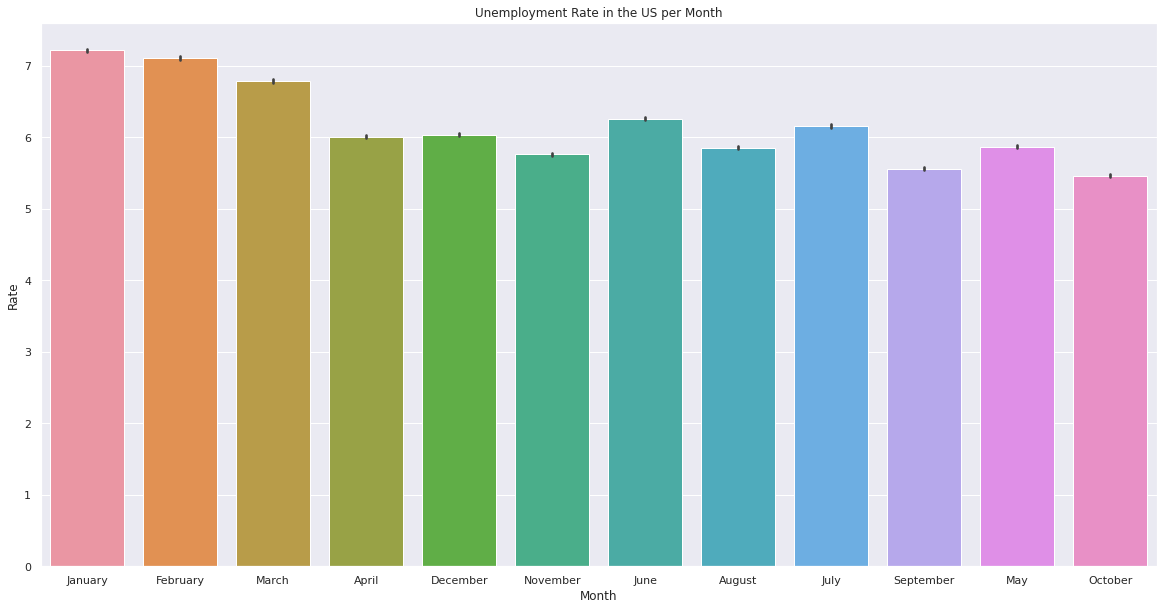

In [26]:
sns.set(rc={'figure.figsize':(20,10)})
ax=sns.barplot(data=datah,x='Month',y='Rate')
   
ax.set_title("Unemployment Rate in the US per Month")

Just like 2010, unemployment rate is also the highest in the first quarter of the year in the US
